<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_5_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rafalib")
install.packages("effsize")
install.packages("pwr")
library(dplyr)
library(rafalib)
library(effsize)
library(pwr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
post <- c(
    8.812, 9.055, 8.749, 9.479, 9.099, 8.754, 9.146, 9.221, 9.173, 8.908,
    9.454, 9.117, 8.814, 8.336, 9.337, 8.987, 8.995, 9.283, 9.246, 9.178
)
#выборка размера детелей

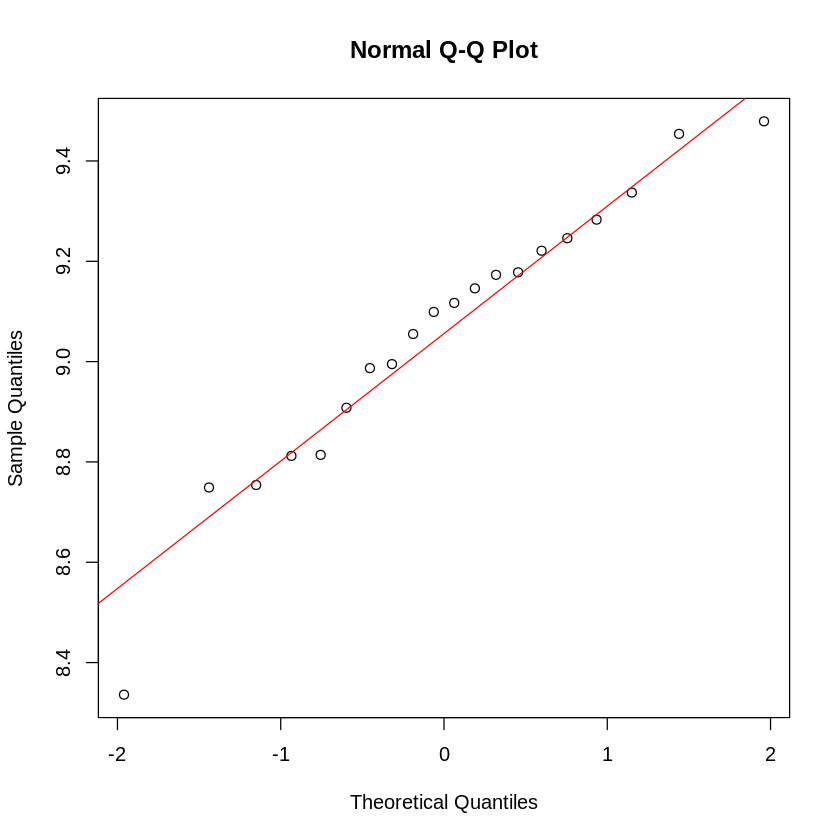

In [ ]:
qqnorm(post) #проверяем на нормальность
qqline(post, col="red")

In [ ]:
# Произведем расчет мощности теста. Мощность устанавливается заранее. Обеспечит ли объем нашей выборки (20) мощность теста
# Размер эффекта, значения ниже которого, мы считаем, не имеют для нас смысла
ES (effect size) = 0.3 см #размер эффекта
# Рассчитываем Z.0 для альфа = 0.05
qnorm(0.95)

[1] 1.644854

In [ ]:
# Вычисляем значение среднего, соответствующего Z.0 = 1.645
sig <- signif(0.3 / sqrt(20), 2) #SE
sig

[1] 0.067

In [ ]:
sig_1 <- 9.0 + 1.645 * sig #значение среднего, к-е соотвестует Z.0 = 1.645
sig_1

[1] 9.110215

In [ ]:
# Вычислим значение Z.1 (для Н1)
z_1 <- (sig_1 - 9.3) / sig
z_1

[1] -2.832612

In [ ]:
# Вычисляем мощность теста
1 - pnorm(z_1)

[1] 0.9976915

In [ ]:
#тестирование гипотезы

In [ ]:
install.packages("BSDA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’




In [ ]:
library(BSDA)

Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [ ]:
z.test(post, alternative="g", mu=9, sigma.x=0.3) #одностор-й z-тест. Гипотеза Н0 верна при альфа 0.05, тк p-value = 0.1971


	One-sample z-Test

data:  post
z = 0.85194, p-value = 0.1971
alternative hypothesis: true mean is greater than 9
95 percent confidence interval:
 8.94681      NA
sample estimates:
mean of x 
  9.05715 


In [ ]:
z.test(post, alternative="two.sided", mu=9, sigma.x=0.3) #двустор-ий тест. Гипотеза Н0 также верна, уровень значимости 0.05, p-value = 0.3942.
# При двуст-м тесте больше шансов приянть Н0, тк p-value увеличивается вдвое


	One-sample z-Test

data:  post
z = 0.85194, p-value = 0.3942
alternative hypothesis: true mean is not equal to 9
95 percent confidence interval:
 8.925672 9.188628
sample estimates:
mean of x 
  9.05715 


In [ ]:
# T-тест. Если объем выборки меньше 30 и неизвестна сигма ГИ, выборки ближе к нормальности

In [ ]:
library(httr)
# Скачаем файл "cardio_train.csv"
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-00-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r06q3qi7s2trku5o49urg78hiivon6iu/1688205750000/16531863302665455688/*/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=76c1cbc0-78fa-4228-a8bd-57d304cd8dae]
  Date: 2023-07-01 10:02
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  cardio_train.csvNULL

In [ ]:
df <- read.csv(filename, sep=";")


In [ ]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo > 20) & (ap_hi<300 & ap_hi>40))


In [ ]:
tidy_set_ <- tidy_set[tidy_set$ap_hi > tidy_set$ap_lo,]
dim(tidy_set_)
dim(tidy_set)
women_ <- tidy_set_$ap_lo[tidy_set_$gender==1]
men_ <- tidy_set_$ap_lo[tidy_set_$gender==2]

[1] 68678    13

[1] 68781    13

In [30]:
t.test(sample(men_, 20), sample(women_, 20), var.equal = TRUE) #выборки с один_ми дисперсиями. Two Sample t-test. Принимаеи Н0


	Two Sample t-test

data:  sample(men_, 20) and sample(women_, 20)
t = -0.58329, df = 38, p-value = 0.5631
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.717712  4.817712
sample estimates:
mean of x mean of y 
    81.00     82.95 


In [ ]:
t.test(sample(men_, 20), sample(women_, 20), var.equal = FALSE) #выборки с разными дисперсиями. 	Welch Two Sample t-test. Принимаеи Н0


	Welch Two Sample t-test

data:  sample(men_, 20) and sample(women_, 20)
t = -0.73627, df = 37.466, p-value = 0.4662
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.751472  3.151472
sample estimates:
mean of x mean of y 
     80.0      81.8 


In [35]:
s_pool <- sqrt(
    ((length(women_)-1)*var(women_)+(length(men_)-1)*var(men_)) /
    (length(women_)+length(men_)-2)
)


#Статистика Cohen's d - один из способов оценить размер эффекта. Показывает сколько стандартных общих отклонений между средними двух групп
#слабый эффект


In [36]:
d <- (mean(men_)-mean(women_))/s_pool
d

[1] 0.141849

In [32]:
d <- cohen.d(d=men_, women_)
d


Cohen's d

d estimate: 0.141849 (negligible)
95 percent confidence interval:
    lower     upper 
0.1261364 0.1575616 


In [33]:
d <- d$estimate
d

[1] 0.141849

In [ ]:
#Рассчитываем мощность теста. Выборки разного размера, используем pwr.t2n.test

In [34]:
pwr.t2n.test(n1=length(women_), n2=length(men_), d=d, sig.level=0.05, alternative="two.sided")


     t test power calculation 

             n1 = 44735
             n2 = 23943
              d = 0.141849
      sig.level = 0.05
          power = 1
    alternative = two.sided


In [37]:
t.test(men_, women_, alternative="two.sided") # С помощью функции t.test, протестируем гипотезу. Найдены стат.значимые значения, к-е могут быть некорректными из-за объема выборки
# Увеличивая объем выборки, уменьшается p-value. Такие меленькие значения p-value не представляеют интерес



	Welch Two Sample t-test

data:  men_ and women_
t = 17.841, df = 49926, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.192583 1.486963
sample estimates:
mean of x mean of y 
 82.17558  80.83581 


In [ ]:
# Рассчет эффектв в % и его ДИ

In [38]:
((mean(men_)-mean(women_)) / mean(women_)) * 100  # размер эффекта в %, среднее по давлению берем из t-test

[1] 1.6574

In [39]:
t <- t.test(men_, women_, alternative="two.sided")
ci <- t$conf.int #ДИ берем из t-теста
ci / mean(women_) * 100  # доверительный интервал для размера эффекта

[1] 1.475315 1.839485
attr(,"conf.level")
[1] 0.95

In [40]:
attr(ci, "conf.level")

[1] 0.95

In [41]:
pwr.t2n.test(n1=20, power=0.8, d=0.8, sig.level=0.05, alternative="two.sided")


     t test power calculation 

             n1 = 20
             n2 = 34.9757
              d = 0.8
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


In [46]:
# не обнаружили сильного эффекта. Н0 верна
t.test(sample(men_, 20), sample(women_, 35))


	Welch Two Sample t-test

data:  sample(men_, 20) and sample(women_, 35)
t = -0.14036, df = 52.363, p-value = 0.8889
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.588333  3.988333
sample estimates:
mean of x mean of y 
     79.7      80.0 


In [48]:
t.test(sample(men_, 20), mu = 82) #Одновыборочный t.test


	One Sample t-test

data:  sample(men_, 20)
t = 0, df = 19, p-value = 1
alternative hypothesis: true mean is not equal to 82
95 percent confidence interval:
 79.11896 84.88104
sample estimates:
mean of x 
       82 


In [44]:
t.test(
    sample(men_, 20), sample(women_, 20),
    alternative="two.sided", paired=TRUE
)
#Двухвыборочный t.test с зависимыми выборками


	Paired t-test

data:  sample(men_, 20) and sample(women_, 20)
t = 0.07589, df = 19, p-value = 0.9403
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -6.64491  7.14491
sample estimates:
mean difference 
           0.25 
